In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [50]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [51]:
test_y = test['class']
train_y = train['class']

In [53]:
train_y

0       p
1       e
2       p
3       e
4       e
       ..
5194    p
5195    e
5196    p
5197    e
5198    p
Name: class, Length: 5199, dtype: object

In [54]:
test_x = test.drop(['class'], axis=1)
train_x = train.drop(['class'], axis=1)

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [35]:
pd.get_dummies(test_x).values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [70]:
train_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,k,s,n,f,y,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,d
1,f,y,e,t,n,f,c,b,u,t,...,s,g,w,p,w,o,p,n,v,d
2,x,f,y,f,f,f,c,b,p,e,...,k,n,p,p,w,o,l,h,v,p
3,f,f,g,t,n,f,c,b,u,t,...,s,p,w,p,w,o,p,n,y,d
4,f,s,p,t,n,f,c,b,w,e,...,s,w,w,p,w,t,p,w,y,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,f,f,g,f,f,f,c,b,h,e,...,k,b,p,p,w,o,l,h,y,p
5195,b,s,w,t,l,f,c,b,w,e,...,s,w,w,p,w,o,p,n,n,g
5196,x,s,e,f,f,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,l
5197,f,f,e,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,k,y,d


In [56]:
object_cols = [col for col in train_x.columns if train_x[col].dtype == "object"]

In [57]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if train_x[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Categorical columns that will be dropped from the dataset: ['gill-color', 'cap-color']


In [60]:
from sklearn.preprocessing import OneHotEncoder
print(low_cardinality_cols)
# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
OH_X_train = pd.DataFrame(OH_encoder.fit_transform(train_x[low_cardinality_cols]))
OH_X_valid = pd.DataFrame(OH_encoder.transform(test_x[low_cardinality_cols]))

OH_X_train.index = train_x.index
OH_X_valid.index = test_x.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_x.drop(object_cols, axis=1)
num_X_valid = test_x.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_X_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_X_valid], axis=1)


['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [64]:
OH_X_train

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5196,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5197,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
train_y

0       p
1       e
2       p
3       e
4       e
       ..
5194    p
5195    e
5196    p
5197    e
5198    p
Name: class, Length: 5199, dtype: object

In [23]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from numpy import random

In [84]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(OH_X_train, train_y)

DecisionTreeClassifier()

In [85]:
y_pred = clf.predict(OH_X_valid)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
print("Accuracy: "+str(accuracy_score(test_y, y_pred)))

Accuracy: 1.0


In [89]:
pd.get_dummies(y_pred).values

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [90]:
pd.get_dummies(test_y).values

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [80]:
import seaborn as sbn

IndexError: Inconsistent shape between the condition and the input (got (1300, 1) and (1300,))

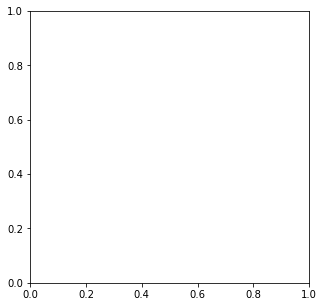

In [82]:
fig, ax = plt.subplots(figsize=(5,5))
sbn.heatmap(y_pred,annot=True)

In [47]:
y = pd.get_dummies(first_column).to_numpy().tolist()

In [48]:
y

[[1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 

In [49]:
np.shape(y)

(5199, 2)

In [50]:
type(y)

list

In [51]:
train['class'] = pd.Series(y)

In [53]:
train

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,"[1, 0]",f,y,e,t,n,f,c,b,u,...,s,w,g,p,w,o,p,k,y,d
1,"[0, 1]",x,s,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,l
2,"[1, 0]",b,y,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,g
3,"[1, 0]",x,y,e,t,n,f,c,b,n,...,s,g,g,p,w,o,p,k,y,d
4,"[0, 1]",k,y,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,"[1, 0]",f,f,n,t,n,f,c,b,u,...,s,w,g,p,w,o,p,k,v,d
5195,"[1, 0]",f,s,n,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,s,g
5196,"[0, 1]",x,y,g,f,f,f,c,b,p,...,k,p,p,p,w,o,l,h,v,g
5197,"[1, 0]",x,s,g,f,n,f,w,b,g,...,k,w,w,p,w,t,p,w,s,g


In [5]:
size = 1024
depth = 10

W_0 media: 5.148346366153521e-05, deviazione: 0.04424320350011045
attivazione_0 media: 0.5631218068480395, deviazione: 0.8245375008262087
W_1 media: -5.386774254905096e-05, deviazione: 0.04422362252423647
attivazione_1 media: 0.5434564737026254, deviazione: 0.8072801138301444
W_2 media: 7.335122377693019e-06, deviazione: 0.04419022594053016
attivazione_2 media: 0.5399381320984054, deviazione: 0.7993965856955504
W_3 media: -6.558222183660466e-05, deviazione: 0.04421856578381579
attivazione_3 media: 0.5222224518381348, deviazione: 0.7704690833673742
W_4 media: 3.0028905453597456e-05, deviazione: 0.04419937057044871
attivazione_4 media: 0.559963957340291, deviazione: 0.8294644509465645
W_5 media: -2.5991489583002688e-05, deviazione: 0.04421147285585365
attivazione_5 media: 0.5428547116610736, deviazione: 0.7942267730867191
W_6 media: 2.4621703470828166e-05, deviazione: 0.04415525136689498
attivazione_6 media: 0.5345854235048189, deviazione: 0.8110760233000524
W_7 media: 0.0001283585503922

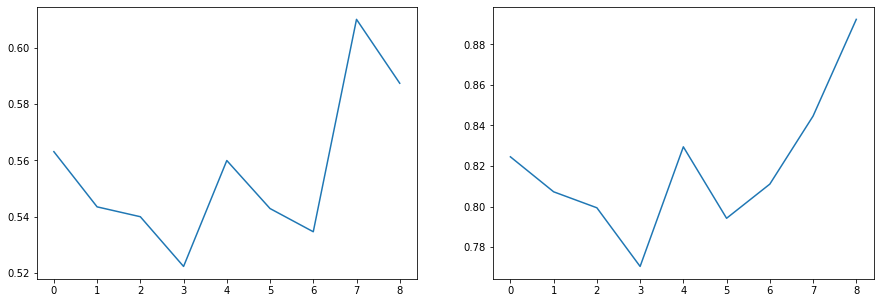

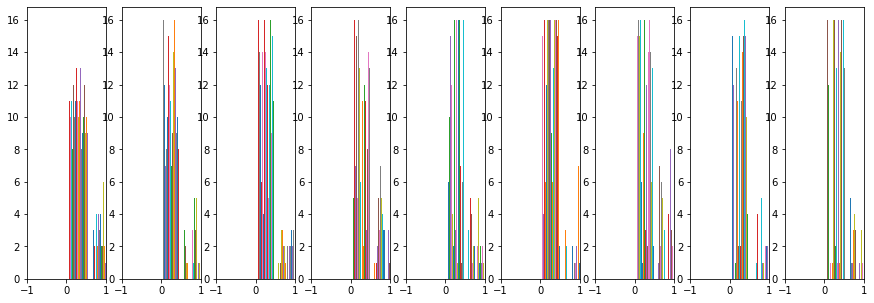

In [6]:
hist = []
depths = [size]* depth
x = np.random.randn(16,depths[0])

means = []
stds = []

for i in range(depth-1):
    W =  np.random.randn(depths[i],depths[i+1]) / np.sqrt(depths[i]/2)
    print(f"W_{i} media: {np.mean(W)}, deviazione: {np.std(W)}")

    x = np.maximum(x.dot(W),0)
    print(f"attivazione_{i} media: {np.mean(x)}, deviazione: {np.std(x)}")
    means.append(np.mean(x))
    stds.append(np.std(x))

    hist.append(x)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(means)
ax[1].plot(stds)

fig, ax = plt.subplots(1, depth-1, figsize=(15,5))
for i in range(depth-1):
    ax[i].set_xlim((-1,1))
    ax[i].hist(hist[i])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

In [19]:
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

In [21]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [57]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33)

In [60]:
X_train

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4407,"[0, 1]",x,f,p,f,c,f,w,n,g,...,s,w,w,p,w,o,p,k,s,d
556,"[1, 0]",f,f,w,f,n,f,w,b,n,...,s,w,w,p,w,o,e,n,s,g
304,"[0, 1]",f,y,y,f,f,f,c,b,g,...,k,p,n,p,w,o,l,h,v,g
3331,"[1, 0]",x,f,e,t,n,f,c,b,w,...,s,w,p,p,w,o,p,k,y,d
3597,"[0, 1]",x,y,g,f,f,f,c,b,g,...,k,b,b,p,w,o,l,h,v,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,"[0, 1]",x,y,n,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
4652,"[0, 1]",x,s,e,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
2377,"[1, 0]",f,s,w,f,n,f,w,b,h,...,s,w,w,p,w,o,e,k,a,g
2791,"[1, 0]",f,f,n,t,n,f,c,b,p,...,s,p,g,p,w,o,p,k,v,d


In [62]:
errors=[]

w1 = np.random.randn(5,23)
w2 = np.random.randn(23,4)

lr = 0.1

for i in range(1000):
    out1 = sigmoid(X_train.dot(w1))
    out2 = sigmoid(out1.dot(w2))
    
    error2 = y_train - out2

    gradient2 = error2 * sigmoid_deriv(out2)
    
    error1 = gradient2.dot(w2.T)
    gradient1 = error1 * sigmoid_deriv(out1)
    
    w2 += lr * out1.T.dot(gradient2)
    w1 += lr * X_train.T.dot(gradient1)
    
    total_error = np.mean(np.square(error2))
    errors.append(total_error)
    accuracy = round((1 - total_error) * 100,2)

print(accuracy)
plt.plot(errors)

ValueError: Dot product shape mismatch, (3483, 23) vs (5, 23)

In [64]:
hist = []
depths = [size]* depth
x = X_train

means = []
stds = []

for i in range(depth-1):
    W = 0.01 * np.random.randn(depths[i],depths[i+1])
    print(f"W_{i} media: {np.mean(W)}, deviazione: {np.std(W)}")

    x = np.tanh(x.dot(W))
    print(f"attivazione_{i} media: {np.mean(x)}, deviazione: {np.std(x)}")
    means.append(np.mean(x))
    stds.append(np.std(x))

    hist.append(x)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(means)
ax[1].plot(stds)

fig, ax = plt.subplots(1, depth-1, figsize=(15,5))
for i in range(depth-1):
    ax[i].set_xlim((-1,1))
    ax[i].hist(hist[i])

W_0 media: -4.839157393488312e-06, deviazione: 0.010005139677005653


ValueError: Dot product shape mismatch, (3483, 23) vs (1024, 1024)